<a href="https://colab.research.google.com/github/Nandishwar04/IMDB-Prediction/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDB-Movie-Data.csv to IMDB-Movie-Data.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mov=pd.read_csv("IMDB-Movie-Data.csv")
print(mov.columns.values)

['Rank' 'Title' 'Genre' 'Description' 'Director' 'Actors' 'Year'
 'Runtime (Minutes)' 'Rating' 'Votes' 'Revenue (Millions)' 'Metascore']


**1.Display Top 10 Rows Of The Dataset**

In [4]:
print(mov.head(10))

   Rank                    Title                       Genre  \
0     1  Guardians of the Galaxy     Action,Adventure,Sci-Fi   
1     2               Prometheus    Adventure,Mystery,Sci-Fi   
2     3                    Split             Horror,Thriller   
3     4                     Sing     Animation,Comedy,Family   
4     5            Suicide Squad    Action,Adventure,Fantasy   
5     6           The Great Wall    Action,Adventure,Fantasy   
6     7               La La Land          Comedy,Drama,Music   
7     8                 Mindhorn                      Comedy   
8     9       The Lost City of Z  Action,Adventure,Biography   
9    10               Passengers     Adventure,Drama,Romance   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Ni

**2.Display Last 10 Rows Of The Dataset**

In [5]:
print(mov.tail(10))

     Rank                           Title                     Genre  \
990   991  Underworld: Rise of the Lycans  Action,Adventure,Fantasy   
991   992                Taare Zameen Par        Drama,Family,Music   
992   993            Take Me Home Tonight      Comedy,Drama,Romance   
993   994        Resident Evil: Afterlife   Action,Adventure,Horror   
994   995                       Project X                    Comedy   
995   996            Secret in Their Eyes       Crime,Drama,Mystery   
996   997                 Hostel: Part II                    Horror   
997   998          Step Up 2: The Streets       Drama,Music,Romance   
998   999                    Search Party          Adventure,Comedy   
999  1000                      Nine Lives     Comedy,Family,Fantasy   

                                           Description            Director  \
990  An origins story centered on the centuries-old...  Patrick Tatopoulos   
991  An eight-year-old boy is thought to be a lazy ...        

**3.Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [6]:
print(mov.shape)

(1000, 12)


**4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [7]:
print(mov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


**5. Check Missing Values In The Dataset**

In [8]:
print(mov.isnull().values.any())

True


In [9]:
print(mov.isnull().sum())

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755)


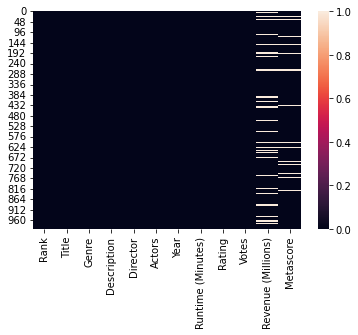

In [10]:
print(sns.heatmap(mov.isnull()))

**6. Drop All The  Missing Values**

In [11]:
per_missing = mov.isnull().sum()*100 / len(mov)
print(per_missing)

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64


In [12]:
print(mov.dropna(axis=0))

     Rank                     Title                     Genre  \
0       1   Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2                Prometheus  Adventure,Mystery,Sci-Fi   
2       3                     Split           Horror,Thriller   
3       4                      Sing   Animation,Comedy,Family   
4       5             Suicide Squad  Action,Adventure,Fantasy   
..    ...                       ...                       ...   
993   994  Resident Evil: Afterlife   Action,Adventure,Horror   
994   995                 Project X                    Comedy   
996   997           Hostel: Part II                    Horror   
997   998    Step Up 2: The Streets       Drama,Music,Romance   
999  1000                Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...     

**7. Check For Duplicate Data**

In [13]:
dup_data = mov.duplicated().any()
print("Are there any duplicate data:", dup_data)

Are there any duplicate data: False


In [14]:
data = mov.drop_duplicates()
print(data)

     Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley 

**8. Get Overall Statistics About The DataFrame**

In [15]:
print(data.describe(include='all'))

               Rank     Title                    Genre  \
count   1000.000000      1000                     1000   
unique          NaN       999                      207   
top             NaN  The Host  Action,Adventure,Sci-Fi   
freq            NaN         2                       50   
mean     500.500000       NaN                      NaN   
std      288.819436       NaN                      NaN   
min        1.000000       NaN                      NaN   
25%      250.750000       NaN                      NaN   
50%      500.500000       NaN                      NaN   
75%      750.250000       NaN                      NaN   
max     1000.000000       NaN                      NaN   

                                              Description      Director  \
count                                                1000          1000   
unique                                               1000           644   
top     A group of intergalactic criminals are forced ...  Ridley Scott   
fre

**9. Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes**

In [16]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [17]:
data[data['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

**10. In Which Year There Was The Highest Average Voting?**

In [18]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [19]:
newdata = data.groupby('Year')['Votes'].mean()
print(newdata.sort_values(ascending=False))

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


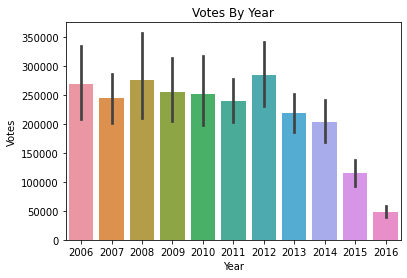

In [20]:
print(sns.barplot(x='Year', y = 'Votes', data=data))
plt.title("Votes By Year")
plt.show()

**11. In Which Year There Was The Highest Average Revenue?**

In [21]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [22]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


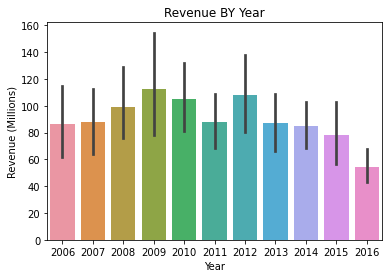

In [23]:
print(sns.barplot(x='Year', y = 'Revenue (Millions)', data=data))
plt.title("Revenue BY Year")
plt.show()

**12. Find The Average Rating For Each Director**

In [24]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [25]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

**13. Display Top 10 Lengthy Movies Title and Runtime**

In [26]:
data.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [28]:
top10_len=data.nlargest(10, 'Runtime (Minutes)')[['Title','Runtime (Minutes)']]\
.set_index('Title')

In [29]:
top10_len

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


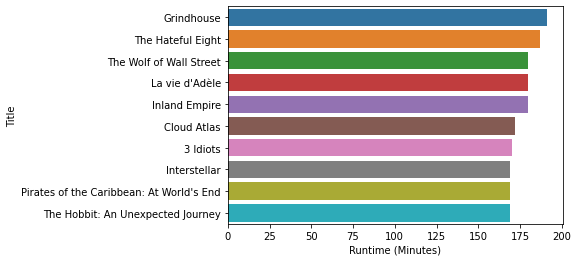

In [30]:
sns.barplot(x='Runtime (Minutes)', y = top10_len.index,data=top10_len)

**14. Display Number of Movies Per Year**

In [31]:
data.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [32]:
data['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

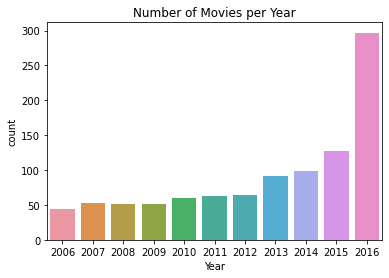

In [33]:
sns.countplot(x='Year',data=data)
plt.title("Number of Movies per Year")
plt.show

**15. Find Most Popular Movie Title (Highest Revenue)**

In [34]:
data.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [35]:
data[data['Revenue (Millions)'].max()==data['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

**16. Display Top 10 Highest Rated Movie Titles And its Directors**

In [36]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [37]:
top10_len=data.nlargest(10, 'Rating')[['Title','Rating','Director']]\
.set_index('Title')

In [38]:
top10_len

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Dangal,8.8,Nitesh Tiwari
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan


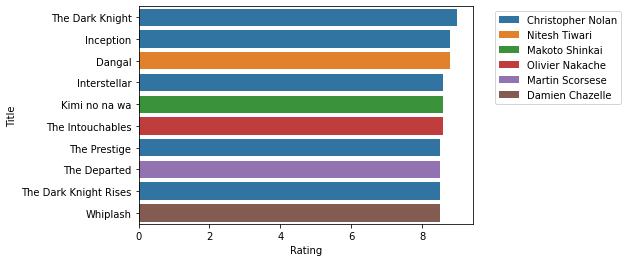

In [39]:
sns.barplot(x='Rating',y=top10_len.index,data=top10_len,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

**17. Display Top 10 Highest Revenue Movie Titles**

In [40]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [41]:
top_10=data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].\
set_index('Title')

In [42]:
top_10

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


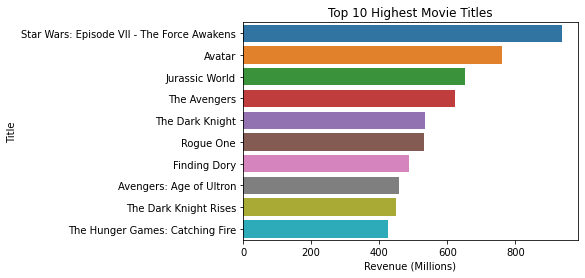

In [43]:
sns.barplot(x='Revenue (Millions)', y=top_10.index,data=top_10)
plt.title("Top 10 Highest Movie Titles")
plt.show()

**18.  Find Average Rating of Movies Year Wise**

In [44]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [45]:
data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

**19. Does Rating Affect The Revenue?**

In [46]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

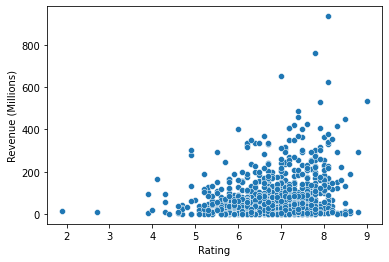

In [47]:
sns.scatterplot(x="Rating",y="Revenue (Millions)",data=data)

**20. Classify Movies Based on Ratings [Excellent, Good, and Average]**

In [48]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [49]:
def rating(rating):
  if rating>=7.0:
    return "Excellent"
  elif rating>=6.0:
    return "Good"
  else:
    return "Average"

In [50]:
data['rating_cat']=data['Rating'].apply(rating)

In [51]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


**21. Count Number of Action Movies**

In [52]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

In [53]:
data['Genre'].dtype

dtype('O')

In [54]:
len(data[data['Genre'].str.contains('Action',case=False)])

303

**22. Find Unique Values From Genre**

In [55]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

In [56]:
data['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [57]:
list1=[]
for value in data['Genre']:
  list1.append(value.split(','))

In [58]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [59]:
one_d=[]
for item in list1:
  for item1 in item:
    one_d.append(item1)

In [60]:
one_d

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [61]:
uni_list=[]
for item in one_d:
  if item not in uni_list:
    uni_list.append(item)
  

In [62]:
uni_list


['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

**23. How Many Films of Each Genre Were Made?**

In [63]:
one_d=[]
for item in list1:
  for item1 in item:
    one_d.append(item1)

In [64]:
one_d

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [65]:
from collections import Counter

In [66]:
Counter(one_d)

Counter({'Action': 303,
         'Adventure': 259,
         'Sci-Fi': 120,
         'Mystery': 106,
         'Horror': 119,
         'Thriller': 195,
         'Animation': 49,
         'Comedy': 279,
         'Family': 51,
         'Fantasy': 101,
         'Drama': 513,
         'Music': 16,
         'Biography': 81,
         'Romance': 141,
         'History': 29,
         'Crime': 150,
         'Western': 7,
         'War': 13,
         'Musical': 5,
         'Sport': 18})

**24.Correlation Matrix**

In [67]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

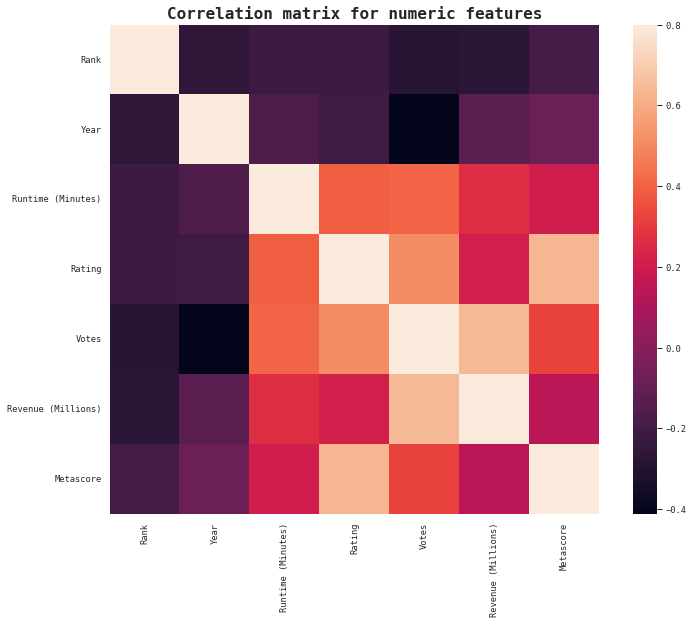

In [68]:
numeric_features=data._get_numeric_data().columns.values.tolist()
title_font = { 'weight' : 'bold','size':'16'}
def corrmap(features, title):
    sns.set(context="paper", font="monospace")
    corrmat = mov[features].corr()
    f, ax = plt.subplots(figsize=(12, 9))
    plt.title(title, **title_font)
    sns.heatmap(corrmat, vmax=.8, square=True)
corrmap(numeric_features,"Correlation matrix for numeric features")

**25.Distribution of the IMDB Ratings**

In [69]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

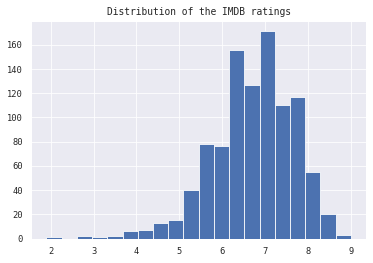

In [70]:
font = {'fontname':'Arial', 'size':'14'}
labels=mov["Rating"]
plt.hist(labels, bins=20)
plt.title("Distribution of the IMDB ratings")
plt.show()